# Classify Ice Tea and Orange Ice using Neural Network

I think this is my first build from scratch not following all the tutorial only watch the reference

The tutorial for reference: [link](https://www.youtube.com/watch?v=uqomO_BZ44g)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
img = image.load_img('data/training/es_jeruk/es_jeruk1.jpg')

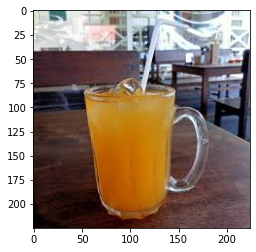

In [3]:
plt.imshow(img)

In [4]:
cv2.imread('data/training/es_jeruk/es_jeruk1.jpg').shape

(225, 224, 3)

Height: 225px

Width: 224px

Ndimension: 3

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255) 

In [6]:
train_dataset = train.flow_from_directory('data/training/',
                                        target_size=(150,150),
                                        batch_size= 3,
                                        class_mode = 'binary')

validation_dataset = train.flow_from_directory('data/validation',
                                              target_size=(150,150),
                                              batch_size = 3,
                                              class_mode = 'binary')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'es_jeruk': 0, 'es_teh': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (150,150,3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #
                                     tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #
                                     tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     ##
                                     tf.keras.layers.Flatten(),
                                     ##
                                     tf.keras.layers.Dense(512, activation='relu'),
                                     ##
                                     tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=10,
                      epochs = 20,
                      validation_data = validation_dataset)

Epoch 1/20
10/10 [==============================] - 2s 171ms/step - loss: 2.7792 - accuracy: 0.5332 - val_loss: 0.7352 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 2s 169ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.7182 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 2s 161ms/step - loss: 0.7289 - accuracy: 0.5359 - val_loss: 0.6720 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 2s 158ms/step - loss: 0.6803 - accuracy: 0.4138 - val_loss: 0.7179 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 2s 160ms/step - loss: 0.7062 - accuracy: 0.7627 - val_loss: 0.6157 - val_accuracy: 0.6000
Epoch 6/20
10/10 [==============================] - 2s 157ms/step - loss: 0.5003 - accuracy: 0.8373 - val_loss: 0.4269 - val_accuracy: 0.8500
Epoch 7/20
10/10 [==============================] - 2s 157ms/step - loss: 0.3959 - accuracy: 0.8185 - val_loss: 0.4000 - val_accuracy: 0.8000
Epoch 

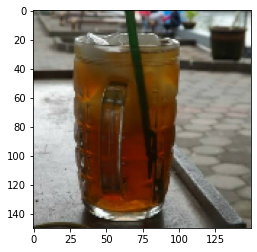

Gambar ini adalah es teh


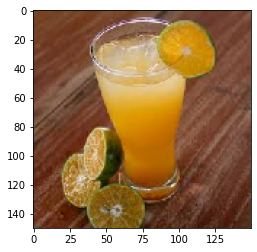

Gambar ini adalah es jeruk


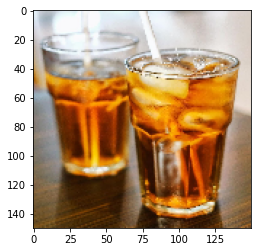

Gambar ini adalah es teh


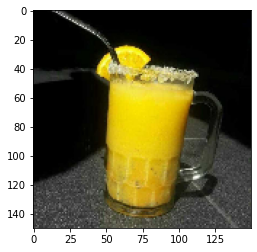

Gambar ini adalah es jeruk


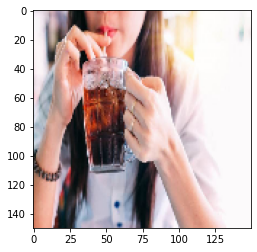

Gambar ini adalah es teh


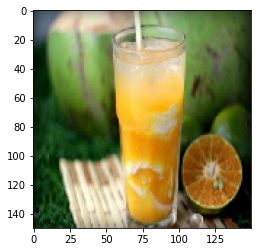

Gambar ini adalah es jeruk


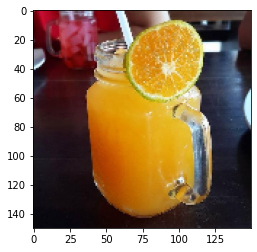

Gambar ini adalah es jeruk


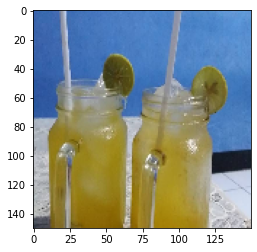

Gambar ini adalah es jeruk


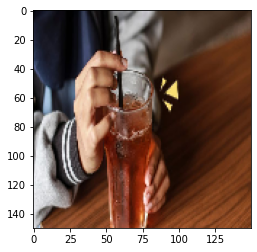

Gambar ini adalah es teh


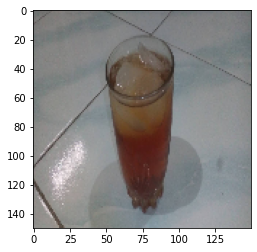

Gambar ini adalah es teh


In [12]:
test_dir = 'data/testing'

for i in os.listdir(test_dir):
    img = image.load_img(test_dir+'//'+i, target_size=(150,150))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print('Gambar ini adalah es jeruk')
    else:
        print('Gambar ini adalah es teh')

Done!!!